In [1]:
import sys
import os

sys.path.append(os.path.abspath('root/deepfashion-image-classification/src'))

In [2]:
import torch
import numpy as np
import random
import yaml

from data.v2.dataset import get_datasets, build_weighted_sampler

from torch.utils.data import WeightedRandomSampler

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
sns.set_theme()

torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

In [3]:
with open('root/deepfashion-image-classification/configs/vit.yaml') as f:
    config = yaml.safe_load(f)

In [4]:
train_dataset, _ = get_datasets(config, train=True)

In [5]:
max_samples_per_class = 500
sampler = build_weighted_sampler(train_dataset, max_samples_per_class)

In [17]:
def visualize_sampler_distribution(dataset, sampler, num_samples=5000):
    sampled_indices = list(sampler)[:num_samples]
    sampled_labels = [dataset.labels[i] for i in sampled_indices]
    label_counts = Counter(sampled_labels)
    # convert labels to names for display
    display_label_counts = {dataset.classes[label]: count for label, count in label_counts.items()}

    # Sort for consistent plotting
    class_names, counts = zip(*sorted(display_label_counts.items()))

    plt.figure(figsize=(12, 5))
    plt.bar(class_names, counts)
    plt.title("Class Distribution from WeightedRandomSampler")
    plt.ylabel("Sample Count")
    plt.xlabel("Class")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

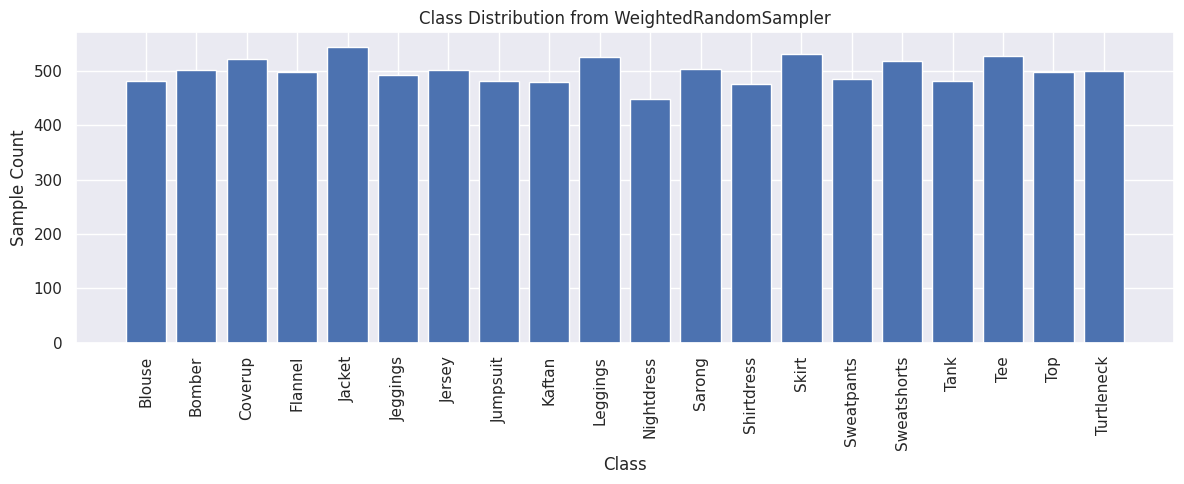

In [18]:
visualize_sampler_distribution(train_dataset, sampler, len(train_dataset.classes) * max_samples_per_class)